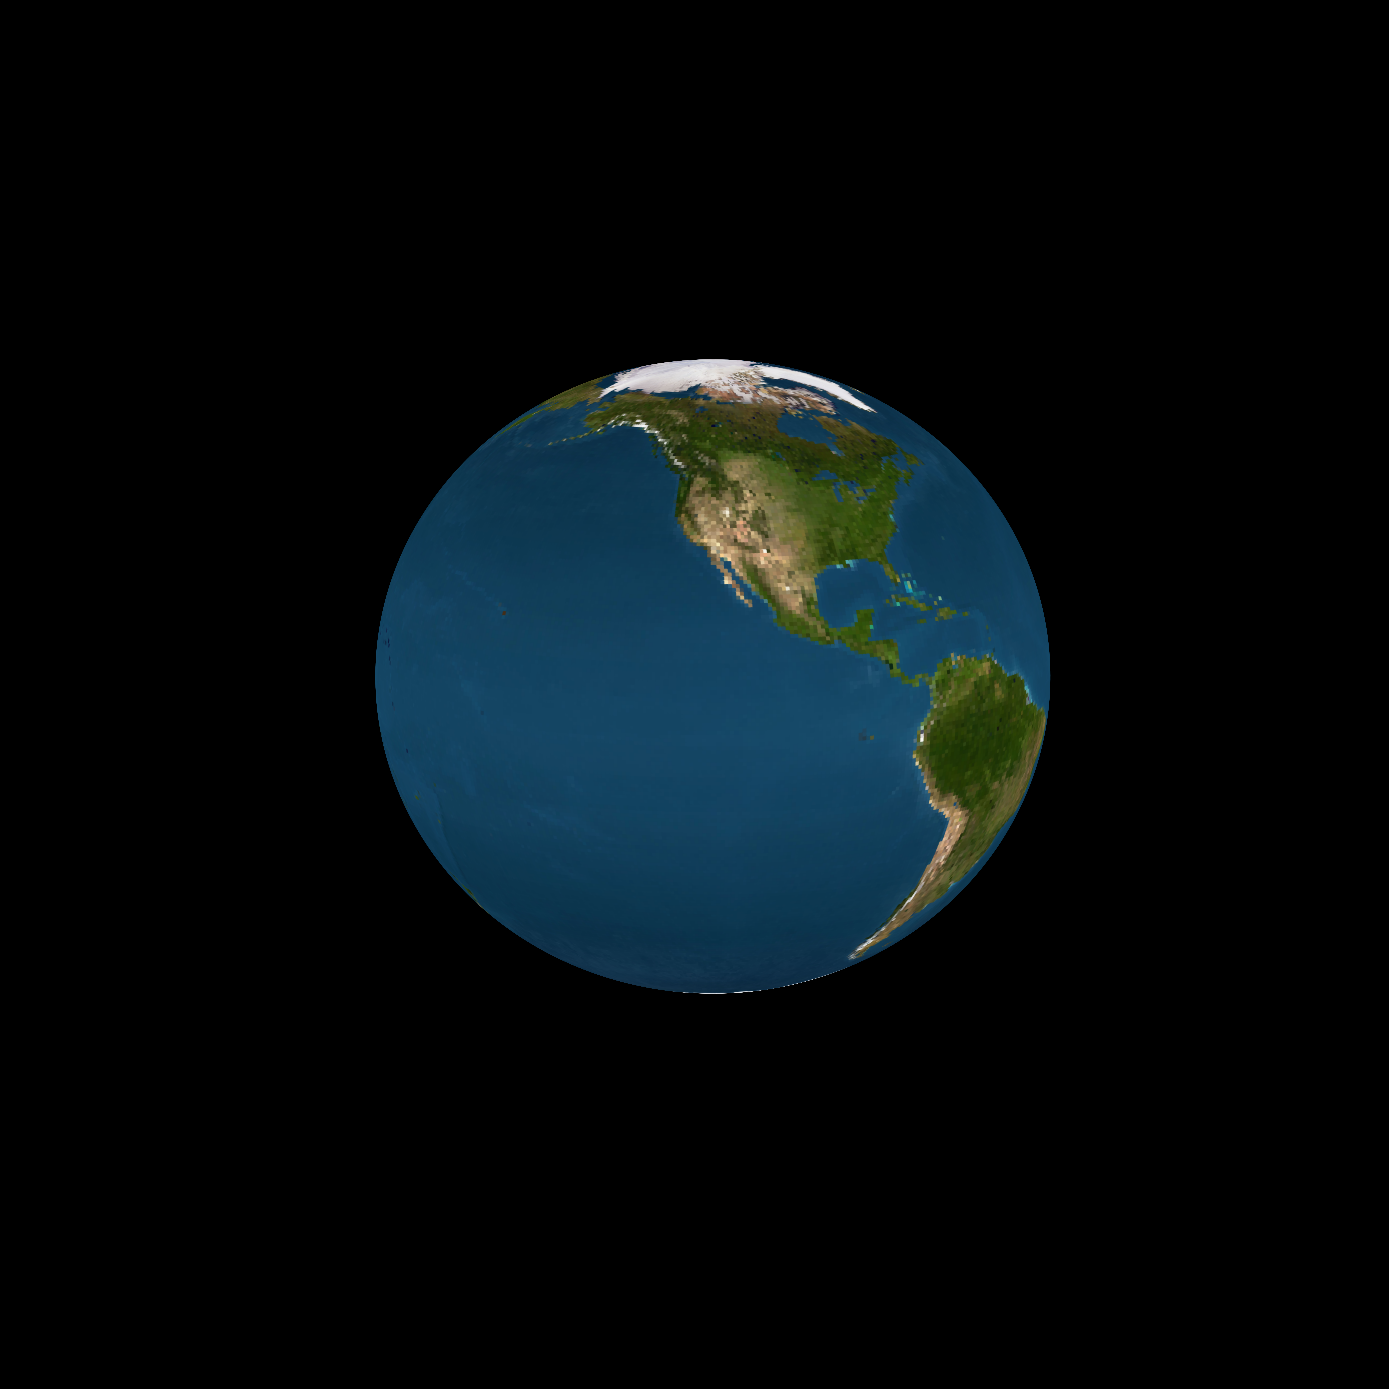

In [3]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.rcParams["figure.dpi"] = 150
plt.style.use('dark_background')
# plt.style.use('default')

earth = image.imread('../datafiles/earth_texture2048x1024.png')
xp, yp, __ = earth.shape

x = np.arange(0, xp, 1)
y = np.arange(0, yp, 1)
Y, X = np.meshgrid(y, x)

phi = np.linspace(0, 2 * np.pi, yp)
theta = np.linspace(0, np.pi, xp)
phigrid, thetagrid = np.meshgrid(phi, theta)

x = np.sin(thetagrid) * np.cos(phigrid)
y = np.sin(thetagrid) * np.sin(phigrid)
z = np.cos(thetagrid)

fig = plt.figure(figsize=(12,12))
ax = plt.subplot(projection='3d')
ax.dist=20
ax.view_init(elev=10, azim=60)

ax.plot_surface(x, y, z, facecolors=earth,
                rstride=4, cstride=4,
                antialiased=True, shade=False)

ax.set_xlim3d([-1.25, 1.25])
ax.set_ylim3d([-1.25, 1.25])
plt.axis('off')
plt.show()

In [ ]:
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')
ax.dist=20

for azim in range(0, 360, 5):
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot_surface(x, y, z, facecolors=earth,
                rstride=4, cstride=4,
                antialiased=False, shade=False)

    ax.view_init(elev=10, azim=azim)

    filename = 'temp/earth'+ "{0:0=3d}".format(azim) + '.png'
    plt.axis('off')
    plt.savefig(filename, dpi=300, bbox_inches='tight', pad_inches=0)
    ax.set_xlim3d([-1.25, 1.25])
    ax.set_ylim3d([-1.25, 1.25])
    plt.gca()
    plt.clf()

In [1]:
from PIL import Image
import glob

# Create the frames
frames = []
imgs = glob.glob("temp/*.png")
for i in imgs:
    new_frame = Image.open(i)
    frames.append(new_frame)

frames[0].save('earth.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=300, loop=0)